<a href="https://colab.research.google.com/github/Lama1421f/python-lab/blob/main/Lab5Lama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from __future__ import print_function
from nltk.metrics import *
Sentence1='There are many similarity measures used in NLTK package'.split()
Sentence2='There are many similarity measures are avaliable in NLTK '.split()
print(accuracy(Sentence1,Sentence2))
setSentence1=set(Sentence1)
setSentence2=set(Sentence2)

precision = precision(setSentence1,setSentence2)
recall = recall(setSentence1,setSentence2)

print('precision = ',precision)
print('recall = ',recall)

f_measure = (2 * precision * recall) / (precision + recall)
print('F-measure = ',f_measure)

0.5555555555555556
precision =  0.875
recall =  0.7777777777777778
F-measure =  0.823529411764706


In [15]:

Sentence1= "There are many similarity measures used in NLTK package".split()
Sentence2= "There are many similarity measures are  available in NLTK".split()
from sklearn.metrics import classification_report
print(classification_report(Sentence1,Sentence2))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   available       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

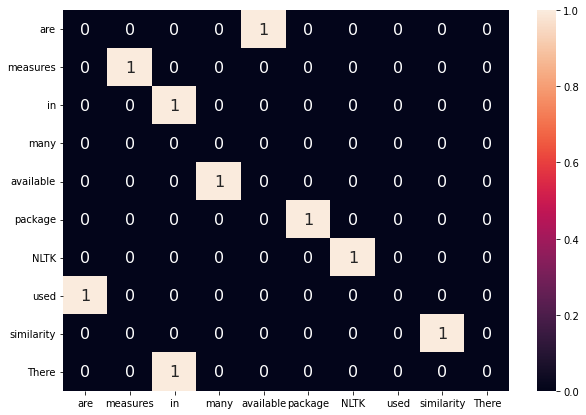

In [19]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
col1=set(Sentence1)
col2=set(Sentence2)
dic= col1.union(col2)
array = confusion_matrix(Sentence1,Sentence2)

df=pd.DataFrame(array,index=dic,columns=dic)
df

plt.figure(figsize = (10,7)) 
sb.heatmap(df, annot=True, annot_kws={"size": 16})

In [25]:
from __future__ import print_function
def _edit_distance_init(len1,len2):
 lev=[]
 for i in range(len1):
  lev.append([0]*len2)
 for i in range(len1):
  lev[i][0]=i
 for j in range (len2):
   lev[0][j]=j
 return lev



In [26]:
def _edit_dist_stop(lev,i,j,s1,s2,last_left,last_right,substitution_cost=1,transpositions=False):

  c1=s1[i-1]
  c2=s2[j-1]
  
  a=lev[i-1][j]+1
  b=lev[i][j-1]+1
  c=lev[i-1][j-1]+(substitution_cost if c1 !=c2 else 0)
  d=c+1
  if transpositions and last_left > 0 and last_right > 0:
    d=lev[last_left-1][last_right-1]+i-last_left+ j - last_right-1
  lev[i][j]= min(a,b,c,d)

In [28]:
def edit_distance(s1,s2,transpositions=False):
  len1 = len(s1)
  len2 = len(s2)
  lev = _edit_distance_init(len1+1,len2+1)

  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev,i+1,j+1,s1,s2,transpositions=transpositions)
  return lev[len1][len2]

In [29]:
from nltk.metrics import *
edit_distance("relate","relation")

3

In [21]:
import nltk 
from nltk.metrics import * 
X=set(Sentence1) 
Y=set(Sentence2)
def jacc_similarity(query, document): 
 first=set(query).intersection(set(document)) 
 second=set(query).union(set(document)) 
 return len(first)/len(second)
   
print(jaccard_distance(X,Y)) 


0.3


In [22]:
import nltk 
from nltk.metrics import * 
X=set(Sentence1) 
Y=set(Sentence2)
def binary_distance(label1, label2): 
 return 0.0 if label1 == label2 else 1.0
 
binary_distance(X, Y) 

1.0

In [23]:
def masi(label1, label2): 
 len_intersection = len(label1.intersection(label2)) 
 len_union = len(label1.union(label2)) 
 len_label1 = len(label1) 
 len_label2 = len(label2) 

 if len_label1 == len_label2 and len_label1 == len_intersection: m = 1
 elif len_intersection == min(len_label1, len_label2): m = 0.67
 elif len_intersection > 0: m = 0.33
 else: m = 0
 return 1 - (len_intersection / float(len_union)) * m 
X=set([10,20,30,40]) 
Y=set([30,50,70]) 
masi(X, Y) 

0.945